In [1]:
import pandas as pd
import requests
import numpy as np
from google.colab import files
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
import matplotlib.pyplot as plt
import arviz as az
from datetime import datetime, timedelta
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, log_loss
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from bs4 import BeautifulSoup
import chardet
from statsmodels.tsa.stattools import adfuller
from requests.adapters import HTTPAdapter
import yfinance as yf
from xgboost.callback import TrainingCallback
import matplotlib.font_manager as font_manager
import itertools
from sklearn.decomposition import PCA
import pandas_datareader as pdr

In [2]:
uploaded = files.upload()

Saving news_analysis_results_复星医2.csv to news_analysis_results_复星医2.csv
Saving news_analysis_results_复星医药.csv to news_analysis_results_复星医药.csv
Saving news_analysis_results_贵州茅台.csv to news_analysis_results_贵州茅台.csv
Saving news_analysis_results_海尔智家.csv to news_analysis_results_海尔智家.csv
Saving news_analysis_results_海螺水泥.csv to news_analysis_results_海螺水泥.csv
Saving news_analysis_results_航发动力.csv to news_analysis_results_航发动力.csv
Saving news_analysis_results_航发动力_2.csv to news_analysis_results_航发动力_2.csv
Saving news_analysis_results_恒瑞医药.csv to news_analysis_results_恒瑞医药.csv
Saving news_analysis_results_恒生电子.csv to news_analysis_results_恒生电子.csv
Saving news_analysis_results_宏观 copy.csv to news_analysis_results_宏观 copy.csv
Saving news_analysis_results_宏观.csv to news_analysis_results_宏观.csv
Saving news_analysis_results_科大讯飞.csv to news_analysis_results_科大讯飞.csv
Saving news_analysis_results_民生银行.csv to news_analysis_results_民生银行.csv
Saving news_analysis_results_浦发银行.csv to news_analysis_res

In [3]:

feature_map = {
    '3日后收盘价预计涨跌（%）': '3-day Price Change (%)',
    '宏观新闻评分': 'Macro News Score',
    '美债收益率': 'US Bond Yield',
    'USDtoCNY': 'USD to CNY',
    '最大成交差价（元）': 'Max Transaction Price Difference (CNY)',
    '收盘价（元）': 'Closing Price (CNY)',
    '5日后收盘价预计涨跌（%）': '5-day Price Change (%)',
    '5日成交量总和（手）': '5-day Total Volume',
    '3日收盘价涨跌幅（%）': '3-day Closing Price Change (%)',
    '宏观新闻评分累计': 'Accumulated Macro News Score',
    '影响评分累计': 'Accumulated Stock News Score',
    '3日成交量总和（手）': '3-day Total Volume',
    '最高价（元）': 'Highest Price (CNY)',
    '成交额（元）': 'Transaction Amount (CNY)',
    '开盘预涨幅（%）': 'Opening Price Increase (%)',
    '前日收盘价（元）': 'Previous Day Closing Price (CNY)',
    '开盘价（元）': 'Opening Price (CNY)',
    '最低价（元）': 'Lowest Price (CNY)',
    '成交量（手）': 'Transaction Volume',
    '收盘价涨跌幅（%）': 'Closing Price Change (%)',
    '换手率（%）': 'Turnover Rate (%)',
    '影响评分': 'Stock News Score',
    '5日收盘价涨跌幅（%）': '5-day Closing Price Change (%)',
    '当日涨跌幅（%）': 'Day Change (%)',
    '涨跌幅（%）': 'Price Change (%)',
    '涨跌额（元）': 'Price Change Amount (CNY)',
    '振幅（%）': 'Amplitude (%)',
    '交易日': 'Trading Days'
}

In [159]:


stock_dic = {
    "浦发银行": "600000",
    "上海机场": "600009",
    "民生银行": "600016",
    "中国石化": "600028",
    "中信证券": "600030",
    "三一重工": "600031",
    "招商银行": "600036",
    "保利地产": "600048",
    "中国联通": "600050",
    "上汽集团": "600104",
    "复星医药": "600196",
    "恒瑞医药": "600276",
    "万华化学": "600309",
    "通威股份": "600438",
    "贵州茅台": "600519",
    "山东黄金": "600547",
    "恒生电子": "600570",
    "海螺水泥": "600585",
    "用友网络": "600588",
    "海尔智家": "600690",
    "三安光电": "600703",
    "闻泰科技": "600745",
    "山西汾酒": "600809",
    "海通证券": "600837",
    "伊利股份": "600887",
    "航发动力": "600893",
    "中泰证券": "600918",
    "隆基股份": "601012",
    "中信建投": "601066",
    "中国神华": "601088",
    "工业富联": "601138",
    "兴业银行": "601166",
    "国泰君安": "601211",
    "农业银行": "601288",
    "中国平安": "601318",
    "新华保险": "601336",
    "工商银行": "601398",
    "中国太保": "601601",
    "中国人寿": "601628",
    "中国建筑": "601668",
    "华泰证券": "601688",
    "光大银行": "601818",
    "中国铁建": "601857",
    "中国中免": "601888",
    "紫金矿业": "601899",
    "中公教育": "601995",
    "药明康德": "603259",
    "海天味业": "603288",
    "韦尔股份": "603501",
    "兆易创新": "603986"
}

# company_names = ['浦发银行', '三安光电', '通威股份', '三一重工', '复星医药', '贵州茅台', '上海机场', '民生银行', '中国石化', '招商银行', '中国联通', '上汽集团', '恒瑞医药', '万华化学', '山东黄金', '恒生电子', '海螺水泥', '用友网络', '海尔智家', '闻泰科技', '山西汾酒']

company_names = ['山西汾酒']

all_stocks_data = pd.DataFrame()


In [160]:
for comp in company_names:

  # Variables
  # licence_key = '14572456990e801e1a'  # Replace with your actual license key
  licence_key = '335416d33948bb7bb'
  stock_code = stock_dic[comp]
  time_frame = 'dn'

  # Construct URL
  url = f'http://api.mairui.club/hszbl/fsjy/{stock_code}/{time_frame}/{licence_key}'

  # Make the HTTP GET request
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      full_data = response.json()
      data_for_arima = full_data
      if full_data is not None:
          for day in full_data:
              print(day)
      else:
          print("No data available for the given range.")
  else:
      print("Failed to retrieve data:", response.status_code, response.text)


  company_name = comp

  news_data = pd.read_csv(f'news_analysis_results_{company_name}.csv', parse_dates=['发布时间'])
  macronews_data = pd.read_csv(f'news_analysis_results_宏观.csv', parse_dates=['发布时间'])
  print(news_data)


  # Cleaning news data
  # transfer string of date data to data object
  news_data['发布时间'] = news_data['发布时间'].astype(str).str.replace('/', '-')
  news_data['发布时间'] = pd.to_datetime(news_data['发布时间'])

  # extract date as YYYY-MM-DD and generate a new column
  news_data['日期'] = news_data['发布时间'].dt.date
  # Change the date column format datetime64
  news_data['日期'] = pd.to_datetime(news_data['日期'])

  print(news_data)

  # Change 'No rating found' into '0', and change Rating data from string to int
  news_data['影响评分'] = news_data['影响评分'].replace('No rating found', '0')
  news_data['影响评分'] = pd.to_numeric(news_data['影响评分'], errors='coerce')

  # Sum up the ratings of news in same day
  news_rating = news_data.groupby('日期')['影响评分'].sum().reset_index()
  print(news_rating)


  # Cleaning macro news data

  macronews_data['发布时间'] = pd.to_datetime(macronews_data['发布时间'], errors='coerce')

  # extract date as YYYY-MM-DD and generate a new column
  macronews_data['日期'] = macronews_data['发布时间'].dt.date
  # Change the date column format datetime64
  macronews_data['日期'] = pd.to_datetime(macronews_data['日期'])

  # print to check
  # print(news_data.head())

  # Change 'No rating found' into '0', and change Rating data from string to int
  macronews_data['宏观新闻评分'] = macronews_data['影响评分'].replace('No rating found', '0')
  macronews_data['宏观新闻评分'] = pd.to_numeric(macronews_data['宏观新闻评分'], errors='coerce')

  # Sum up the ratings of news in same day
  macronews_rating = macronews_data.groupby('日期')['宏观新闻评分'].sum().reset_index()


  # Convert strings to datetime objects for comparison
  start_date = '2024-01-01'
  end_date = '2024-06-01'
  start = datetime.strptime(start_date, "%Y-%m-%d")
  end = datetime.strptime(end_date, "%Y-%m-%d")

  start_tech = start - timedelta(days=10)
  # Filter data
  filtered_data = [item for item in full_data if start_tech <= datetime.strptime(item['d'], "%Y-%m-%d") <= end]

  # Print filtered data
  # for entry in filtered_data:
  #     print(entry)


  # Define the DataFrame columns based on the provided image table
  columns = {
      'd': '日期',
      'o': '开盘价（元）',
      'h': '最高价（元）',
      'l': '最低价（元）',
      'c': '收盘价（元）',
      'v': '成交量（手）',
      'e': '成交额（元）',
      'zf': '振幅（%）',
      'hs': '换手率（%）',
      'zd': '涨跌幅（%）',
      'zde': '涨跌额（元）'
  }

  # Create a DataFrame
  tech_data = pd.DataFrame(filtered_data)

  # Rename the columns using the provided names in Chinese
  tech_data = tech_data.rename(columns=columns)

  tech_data.head(10) # Display the first few rows of the DataFrame




  #Cleaning technical data

  for column in tech_data.columns:
      # Skip the Date colume
      if column != '日期':
          tech_data[column] = pd.to_numeric(tech_data[column], errors='coerce')

  # print(technical_data)

  tech_data.sort_values('日期', inplace=True)
  # Calculate close price's increased percentage
  tech_data['收盘价涨跌幅（%）'] = tech_data['收盘价（元）'].pct_change() * 100

  # Calculate range of high to low price
  tech_data['最大成交差价（元）'] = tech_data['最高价（元）'] - tech_data['最低价（元）']

  # Calculate Close to Open price increased percentage
  tech_data['当日涨跌幅（%）'] = ((tech_data['收盘价（元）'] - tech_data['开盘价（元）']) / tech_data['开盘价（元）']) * 100

  # Calculate increased percentage of open price today compared with closed price in previouse day
  tech_data['前日收盘价（元）'] = tech_data['收盘价（元）'].shift(1)
  tech_data['开盘预涨幅（%）'] = ((tech_data['开盘价（元）'] - tech_data['前日收盘价（元）']) / tech_data['前日收盘价（元）']) * 100

  # Define dependent variable
  tech_data['次日预计涨跌幅（%）'] = (tech_data['收盘价（元）'].shift(-1) - tech_data['收盘价（元）'])/tech_data['收盘价（元）']*100

  tech_data['5日收盘价涨跌幅（%）'] = tech_data['收盘价（元）'].rolling(window=5).apply(
      lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if x.iloc[0] != 0 else 0
  )

  # Calculate the total trading volume for the past 5 days
  tech_data['5日成交量总和（手）'] = tech_data['成交量（手）'].rolling(window=5).sum()

  tech_data['5日后收盘价预计涨跌（%）'] = ((tech_data['收盘价（元）'].shift(-5) - tech_data['收盘价（元）']) / tech_data['收盘价（元）']) * 100

  tech_data['3日收盘价涨跌幅（%）'] = tech_data['收盘价（元）'].rolling(window=3).apply(
      lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if x.iloc[0] != 0 else 0
  )
  # Calculate the total trading volume for the past 3 days
  tech_data['3日成交量总和（手）'] = tech_data['成交量（手）'].rolling(window=3).sum()

  tech_data['3日后收盘价预计涨跌（%）'] = ((tech_data['收盘价（元）'].shift(-3) - tech_data['收盘价（元）']) / tech_data['收盘价（元）']) * 100



  # American relevant data

  # API_KEY = 'CG4VJP9GSRM0IMWR'

  # def get_forex_data(api_key, from_symbol, to_symbol):
  #     url = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol={from_symbol}&to_symbol={to_symbol}&apikey={api_key}&outputsize=full'
  #     response = requests.get(url)
  #     data = response.json()

  #     forex_data = data['Time Series FX (Daily)']
  #     df = pd.DataFrame(columns=['Close'])

  #     for date, value in forex_data.items():
  #         df.loc[date] = float(value['4. close'])

  #     return df

  # df_usdcnh = get_forex_data(API_KEY, 'USD', 'CNH')

  # df_usdcnh.index = pd.to_datetime(df_usdcnh.index).normalize()
  # df_usdcnh.sort_index(inplace=True)  # 确保日期排序
  # df_usdcnh['Close'] = pd.to_numeric(df_usdcnh['Close'], errors='coerce')
  # df_usdcnh.columns = ['USDtoCNY']
  # df_usdcnh.index.name = '日期'
  # close_prices_usdcnh = df_usdcnh.loc[start:end]
  # print(close_prices_usdcnh)

  def get_forex_data_pdr(start_date, end_date):
    # 使用 pandas_datareader 从 FRED 获取数据
    df = pdr.get_data_fred('DEXCHUS', start_date, end_date)
    df.reset_index(inplace=True)
    df.columns = ['日期', 'USDtoCNY']
    return df

  # 获取数据
  close_prices_usdcnh = get_forex_data_pdr(start, end)

  # 检查并打印数据
  if close_prices_usdcnh.empty:
      print("没有获取到数据，请检查日期和数据源。")
  else:
      print(close_prices_usdcnh)

  tlt = yf.Ticker("TLT")
  data_tlt = tlt.history(start=start, end=end)
  close_prices_tlt = data_tlt['Close'].to_frame()
  close_prices_tlt.index = pd.to_datetime(close_prices_tlt.index, utc=True).tz_localize(None).normalize()
  close_prices_tlt['Close'] = pd.to_numeric(close_prices_tlt['Close'], errors='coerce')
  close_prices_tlt.columns = ['美债收益率']
  close_prices_tlt.index.name = '日期'
  print(close_prices_tlt)



  # Combine data and process data
  tech_data['日期'] = pd.to_datetime(tech_data['日期'])
  news_rating['日期'] = pd.to_datetime(news_rating['日期'])

  all_dates = pd.DataFrame(pd.date_range(start=start, end=end), columns=['日期'])
  merged_data1 = pd.merge(all_dates, tech_data, on='日期', how='outer')
  merged_data2 = pd.merge(merged_data1, news_rating, on='日期', how='outer')
  merged_data3 = pd.merge(merged_data2, macronews_rating, on='日期', how='outer')
  merged_data4 = pd.merge(merged_data3, close_prices_usdcnh, on='日期', how='outer')
  merged_data5 = pd.merge(merged_data4, close_prices_tlt, on='日期', how='outer')

  # Create a filtered copy to avoid SettingWithCopyWarning
  merged_filtered_data = merged_data5[(merged_data5['日期'] >= pd.to_datetime(start)) & (merged_data5['日期'] <= pd.to_datetime(end))].copy()
  merged_filtered_data['交易日'] = np.where(merged_filtered_data['开盘价（元）'].notna(), 1, 0)

  # Initialize cumulative sum column with 0
  merged_filtered_data['累计影响评分'] = 0
  merged_filtered_data['累计宏观影响评分'] = 0

  # Calculate cumulative score for non-trading days
  cumulative_score = 0
  cumulative_macro_score = 0
  for i in range(len(merged_filtered_data)):
      if merged_filtered_data.iloc[i]['交易日'] == 0:
          # If it's a non-trading day, accumulate the scores
          cumulative_score += merged_filtered_data.iloc[i]['影响评分']
          cumulative_macro_score += merged_filtered_data.iloc[i]['累计宏观影响评分']
      else:
          # If it's a trading day, apply the cumulative score and reset it
          merged_filtered_data.at[i, '累计影响评分'] = merged_filtered_data.iloc[i]['影响评分'] + cumulative_score
          merged_filtered_data.at[i, '累计宏观影响评分'] = merged_filtered_data.iloc[i]['宏观新闻评分'] + cumulative_macro_score
          cumulative_score = 0
          cumulative_macro_score = 0
      # If it's the last non-trading day, apply the cumulative score to the last trading day seen
      if i == len(merged_filtered_data) - 1 and merged_filtered_data.iloc[i]['交易日'] == 0:
          merged_filtered_data.at[i, '累计影响评分'] = cumulative_score
          merged_filtered_data.at[i, '累计宏观影响评分'] = cumulative_macro_score


  # Apply the cumulative scores to the '影响评分' column
  merged_filtered_data['影响评分'] = merged_filtered_data['累计影响评分']
  merged_filtered_data['宏观新闻评分'] = merged_filtered_data['累计宏观影响评分']
  merged_filtered_data.drop(['累计影响评分', '累计宏观影响评分'], axis=1, inplace=True)
  merged_filtered_data['影响评分累计'] = merged_filtered_data['影响评分'].rolling(window=3, min_periods=1).sum()
  merged_filtered_data['宏观新闻评分累计'] = merged_filtered_data['宏观新闻评分'].rolling(window=6, min_periods=1).sum()

  cols = list(merged_filtered_data.columns)
  cols.append(cols.pop(cols.index('次日预计涨跌幅（%）')))


  merged_filtered_data = merged_filtered_data[cols]

  # Display the head of the DataFrame
  print(merged_filtered_data)
  all_stocks_data = pd.concat([all_stocks_data, merged_filtered_data], ignore_index=True)

print(all_stocks_data)


流式输出内容被截断，只能显示最后 5000 行内容。
{'d': '2004-05-20', 'o': '6.77', 'h': '7.00', 'l': '6.73', 'c': '6.91', 'v': '4594', 'e': '3162841.00', 'zf': '3.99', 'hs': '0.60', 'zd': '2.07', 'zde': '0.14'}
{'d': '2004-05-21', 'o': '6.91', 'h': '6.93', 'l': '6.85', 'c': '6.92', 'v': '2989', 'e': '2061433.00', 'zf': '1.16', 'hs': '0.39', 'zd': '0.14', 'zde': '0.01'}
{'d': '2004-05-24', 'o': '6.98', 'h': '6.98', 'l': '6.74', 'c': '6.76', 'v': '2317', 'e': '1577403.00', 'zf': '3.47', 'hs': '0.30', 'zd': '-2.31', 'zde': '-0.16'}
{'d': '2004-05-25', 'o': '6.76', 'h': '6.76', 'l': '6.54', 'c': '6.59', 'v': '3892', 'e': '2570663.00', 'zf': '3.25', 'hs': '0.51', 'zd': '-2.51', 'zde': '-0.17'}
{'d': '2004-05-26', 'o': '6.57', 'h': '6.74', 'l': '6.45', 'c': '6.50', 'v': '8225', 'e': '5376711.00', 'zf': '4.40', 'hs': '1.07', 'zd': '-1.37', 'zde': '-0.09'}
{'d': '2004-05-27', 'o': '6.55', 'h': '6.83', 'l': '6.48', 'c': '6.63', 'v': '7677', 'e': '5086086.00', 'zf': '5.38', 'hs': '1.00', 'zd': '2.00', 'zde': '0.13'}
{

In [ ]:
desktop_path = r"C:\Users\ZhouYankai\Desktop\all_stocks_data.csv"

# 写入CSV文件
all_stocks_data.to_csv(desktop_path, index=False, encoding='utf-8')

print("Data has been written to the CSV file on the desktop.")

Data has been written to the CSV file on the desktop.


In [161]:
print(all_stocks_data)

            日期  开盘价（元）  最高价（元）  最低价（元）  收盘价（元）   成交量（手）        成交额（元）  振幅（%）  \
0   2024-01-01     NaN     NaN     NaN     NaN      NaN           NaN    NaN   
1   2024-01-02  228.08  228.70  221.49  221.79  45686.0  1.020209e+09   3.12   
2   2024-01-03  221.01  223.19  219.20  221.07  35216.0  7.772095e+08   1.80   
3   2024-01-04  221.00  221.00  215.17  217.50  40450.0  8.785341e+08   2.64   
4   2024-01-05  216.98  217.82  214.13  215.22  32365.0  6.991674e+08   1.70   
..         ...     ...     ...     ...     ...      ...           ...    ...   
148 2024-05-28  250.14  251.41  247.65  247.97  23678.0  5.889361e+08   1.50   
149 2024-05-29  247.97  248.97  244.35  245.38  30113.0  7.412585e+08   1.86   
150 2024-05-30  244.11  247.00  241.24  243.50  32740.0  7.982018e+08   2.35   
151 2024-05-31  244.00  245.54  241.34  241.34  29509.0  7.171879e+08   1.72   
152 2024-06-01     NaN     NaN     NaN     NaN      NaN           NaN    NaN   

     换手率（%）  涨跌幅（%）  ...  3日成交量总和（手）  3

In [ ]:
def evaluate_feature_set(features):
    # 特征准备
    all_stocks_data_cleaned = all_stocks_data.dropna()
    X = all_stocks_data_cleaned[features]
    y = (all_stocks_data_cleaned['次日预计涨跌幅（%）'] > 0).astype(int)

    # 数据切分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 数据标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 创建DMatrix
    dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
    dtest = xgb.DMatrix(X_test_scaled, label=y_test)

    # 模型参数
    params = {
        'max_depth': 11,
        'min_child_weight': 1,
        'eta': 0.3,
        'subsample': 1,
        'colsample_bytree': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss'
    }

    # 训练模型
    model = xgb.train(params, dtrain, num_boost_round=100)

    # 预测
    y_pred_prob = model.predict(dtest)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # 计算准确率
    return accuracy_score(y_test, y_pred)


# 必须包含的基础特征
base_features = ['影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分']

all_features = all_stocks_data.columns.tolist()  # 获取所有列名
# 可选特征列表
optional_features = [f for f in all_features if f not in base_features and f not in ['日期', '次日预计涨跌幅（%）', '交易日', '3日后收盘价预计涨跌（%）', '5日后收盘价预计涨跌（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分', ' 3日成交量总和（手）', ' 5日成交量总和（手）', '涨跌额（元）', '前日收盘价（元）']]

# 存储最佳准确率和最佳特征组合
best_accuracy = 0
best_combination = []

# 尝试所有特征组合
for L in range(0, 7):  # 最多选择6个特征，最少0个
    for subset in itertools.combinations(optional_features, L):
        current_features = list(subset) + base_features
        accuracy = evaluate_feature_set(current_features)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = current_features
        print(f'Tested combination: {current_features} -> Accuracy: {accuracy}')

print(f'Best accuracy: {best_accuracy}')
print(f'Best feature combination: {best_combination}')


Tested combination: ['影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.4090909090909091
Tested combination: ['开盘价（元）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.5454545454545454
Tested combination: ['最高价（元）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.5
Tested combination: ['最低价（元）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.45454545454545453
Tested combination: ['收盘价（元）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.5454545454545454
Tested combination: ['成交量（手）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.6363636363636364
Tested combination: ['成交额（元）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.7272727272727273
Tested combination: ['振幅（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.5454545454545454
Tested combination: ['换手率（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.6363636363636364
Tested combination: ['涨跌幅（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accu

KeyboardInterrupt: 

In [ ]:
def evaluate_feature_set(features):
    # 特征准备
    X = all_stocks_data[features]
    y = (all_stocks_data['次日预计涨跌幅（%）'] > 0).astype(int)

    # 数据切分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 数据标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 创建DMatrix
    dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
    dtest = xgb.DMatrix(X_test_scaled, label=y_test)

    # 模型参数
    params = {
        'max_depth': 11,
        'min_child_weight': 1,
        'eta': 0.3,
        'subsample': 1,
        'colsample_bytree': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss'
    }

    # 训练模型
    model = xgb.train(params, dtrain, num_boost_round=100)

    # 预测
    y_pred_prob = model.predict(dtest)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # 计算准确率
    return accuracy_score(y_test, y_pred)


# 必须包含的基础特征
base_features = ['影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分']

all_features = all_stocks_data.columns.tolist()  # 获取所有列名
# 可选特征列表
optional_features = [f for f in all_features if f not in base_features and f not in ['日期', '次日预计涨跌幅（%）', '交易日', '3日后收盘价预计涨跌（%）', '5日后收盘价预计涨跌（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分', '涨跌额（元）', '前日收盘价（元）']]

# 存储最佳准确率和最佳特征组合
best_accuracy = 0
best_combination = []

# 尝试所有特征组合
for L in range(0, 7):  # 最多选择6个特征，最少0个
    for subset in itertools.combinations(optional_features, L):
        current_features = list(subset) + base_features
        accuracy = evaluate_feature_set(current_features)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = current_features
        print(f'Tested combination: {current_features} -> Accuracy: {accuracy}')

print(f'Best accuracy: {best_accuracy}')
print(f'Best feature combination: {best_combination}')

流式输出内容被截断，只能显示最后 5000 行内容。
Tested combination: ['成交额（元）', '振幅（%）', '换手率（%）', '涨跌幅（%）', '收盘价涨跌幅（%）', '影响评分', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.7608695652173914
Tested combination: ['成交额（元）', '振幅（%）', '换手率（%）', '涨跌幅（%）', '收盘价涨跌幅（%）', 'USDtoCNY', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.7391304347826086
Tested combination: ['成交额（元）', '振幅（%）', '换手率（%）', '涨跌幅（%）', '收盘价涨跌幅（%）', '美债收益率', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.717391304347826
Tested combination: ['成交额（元）', '振幅（%）', '换手率（%）', '涨跌幅（%）', '最大成交差价（元）', '当日涨跌幅（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.717391304347826
Tested combination: ['成交额（元）', '振幅（%）', '换手率（%）', '涨跌幅（%）', '最大成交差价（元）', '开盘预涨幅（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.6956521739130435
Tested combination: ['成交额（元）', '振幅（%）', '换手率（%）', '涨跌幅（%）', '最大成交差价（元）', '5日收盘价涨跌幅（%）', '影响评分累计', '宏观新闻评分', '宏观新闻评分累计', '宏观新闻评分'] -> Accuracy: 0.6521739130434783
Tested combination: ['成交额

Accuracy: 0.5712788259958071
Confusion Matrix:
 [[318 177]
 [232 227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61       495
           1       0.56      0.49      0.53       459

    accuracy                           0.57       954
   macro avg       0.57      0.57      0.57       954
weighted avg       0.57      0.57      0.57       954



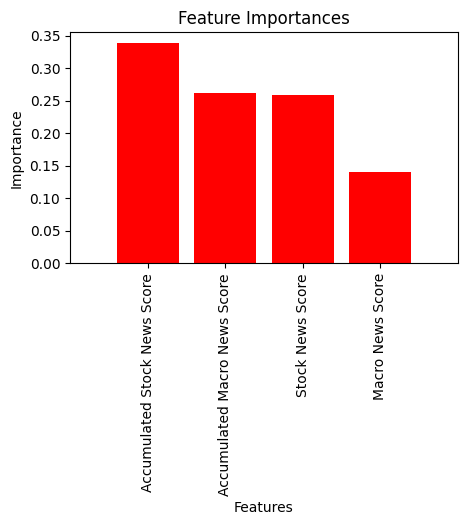

In [ ]:
# Random Forests
technical_noNa = all_stocks_data.dropna()

# 选择特征
# X = technical_noNa.drop(['日期', '次日预计涨跌幅（%）'], axis=1)
# X = technical_noNa[['宏观新闻评分', '影响评分', '开盘价（元）', '收盘价（元）', '最高价（元）', '最低价（元）', '成交量（手）', '成交额（元）', '换手率（%）', '美债收益率', 'USDtoCNY']]
X = technical_noNa[['宏观新闻评分', '影响评分', '宏观新闻评分累计', '影响评分累计']]
y = (technical_noNa['次日预计涨跌幅（%）'] > 0).astype(int)  # 将次日预计涨跌幅转换为二元标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用随机森林模型
rf = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=42)
rf.fit(X_train_scaled, y_train)

# 获取特征重要性
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 进行预测
y_pred = rf.predict(X_test_scaled)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

english_feature_names = [feature_map[X.columns[i]] for i in indices]

# 绘制特征重要性
plt.figure(figsize=(5, 3))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], color="r", align='center')
plt.xticks(range(len(importances)), english_feature_names, rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
# 假设数据已经加载到merged_filtered_data
# 示例数据预处理
technical_noNa = all_stocks_data

# 特征和目标变量
# X = technical_noNa.drop(['日期', '次日预计涨跌幅（%）', '3日后收盘价预计涨跌（%）', '5日后收盘价预计涨跌（%）'], axis=1)
X = technical_noNa[['宏观新闻评分', '影响评分']]
# X = technical_noNa[['宏观新闻评分', '影响评分', '开盘价（元）', '收盘价（元）', '最高价（元）', '最低价（元）', '成交量（手）', '成交额（元）', '换手率（%）', '美债收益率', 'USDtoCNY']]
y = (technical_noNa['次日预计涨跌幅（%）'] > 0).astype(int)  # 将次日预计涨跌幅转换为二元标签

# 数据切分
split_point = int(len(technical_noNa) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define parameters
params = {
    'max_depth': 11,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'lambda': 0.1,
    'alpha': 0.1
}

# Train model and evaluate
evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}
bst = xgb.train(params, dtrain, num_boost_round=300, evals=evals, evals_result=evals_result, verbose_eval=True)

# Plot learning curve
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)
plt.figure(figsize=(12, 5))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['test']['logloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Over Training')
plt.show()

# Prediction and evaluation
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Feature importance
xgb.plot_importance(bst)
plt.title('Feature Importance')
plt.show()

list1 = np.array(y_test)
list2 = np.array(y_pred)
correct_count = np.sum((list1 > 0) == (list2 > 0))
accuracy = correct_count / len(list1)
print('Number of correct about price change', accuracy)

print('y_test', y_test)
print('y_pred', y_pred)

[0]	train-logloss:0.54238	test-logloss:0.49853
[1]	train-logloss:0.49191	test-logloss:0.48087
[2]	train-logloss:0.46128	test-logloss:0.46987
[3]	train-logloss:0.44066	test-logloss:0.46091
[4]	train-logloss:0.42607	test-logloss:0.44607
[5]	train-logloss:0.41370	test-logloss:0.43215
[6]	train-logloss:0.40615	test-logloss:0.42801
[7]	train-logloss:0.40048	test-logloss:0.43121
[8]	train-logloss:0.39520	test-logloss:0.43072
[9]	train-logloss:0.38919	test-logloss:0.43432
[10]	train-logloss:0.38683	test-logloss:0.42929
[11]	train-logloss:0.38540	test-logloss:0.42732
[12]	train-logloss:0.38428	test-logloss:0.42777
[13]	train-logloss:0.38360	test-logloss:0.42735
[14]	train-logloss:0.38235	test-logloss:0.42453
[15]	train-logloss:0.38152	test-logloss:0.42356
[16]	train-logloss:0.38090	test-logloss:0.42182
[17]	train-logloss:0.38040	test-logloss:0.42152
[18]	train-logloss:0.37979	test-logloss:0.42225
[19]	train-logloss:0.37690	test-logloss:0.42693
[20]	train-logloss:0.37633	test-logloss:0.42624
[2

KeyboardInterrupt: 

[ 1.29429923e-01 -7.70989133e-02  7.40270959e-01 -3.62261817e-01
 -1.27014958e-01 -2.02598330e-01 -3.82241320e-01  7.77913438e-01
 -4.76640068e-01  8.29208948e-02 -1.47477225e-01  1.18663723e-01
 -6.35260059e-01  1.23994769e+00  7.54680308e-01  1.64688365e-01
  4.76057975e-01  6.32969418e-01  1.53995419e-01  4.65041797e-01
  7.03712787e-01  4.48093673e-01  4.28701361e-01  4.86188772e-01
  4.13767013e-01  4.74931194e-02 -2.09699114e-01 -1.21824107e-01
 -1.49257246e-01 -8.04058445e-02 -3.89424789e-02 -2.89875987e-01
 -3.00252528e-01 -2.84093519e-01  5.59507641e-04 -2.27720636e-01
 -1.10728072e-01  1.35265499e-01  1.22181872e+00  7.25156081e-02
 -2.49328949e-01  5.00886670e-04 -1.39680111e-01  1.31571379e-01
 -3.80266792e-01  5.57592946e-01 -1.47530694e-01  2.80975946e-01
  8.34298215e-02 -1.15476338e-01  2.45373692e-01  2.42693972e-01
 -6.55631621e-02 -2.31347134e-01  5.92320428e-01 -5.82102455e-01
 -9.72110956e-02 -7.03137923e-01 -5.96832399e-01 -7.96312245e-02
 -7.61294522e-02 -2.18801

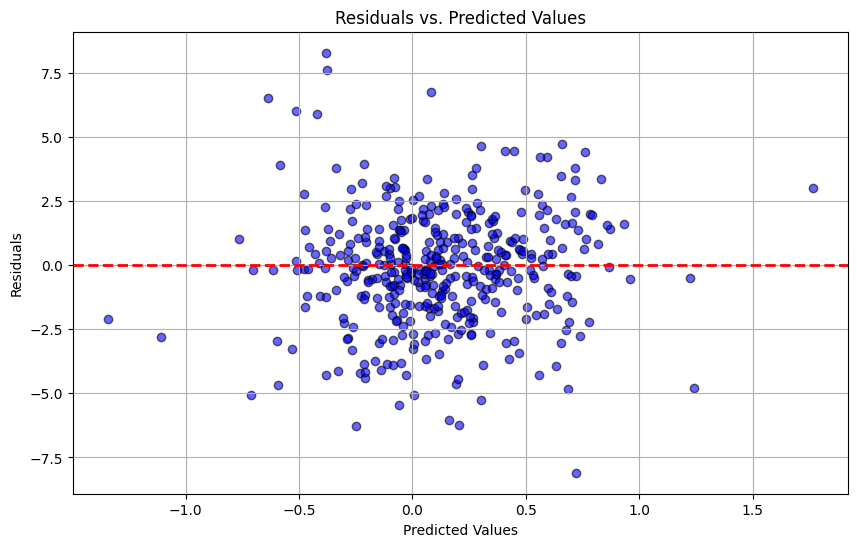

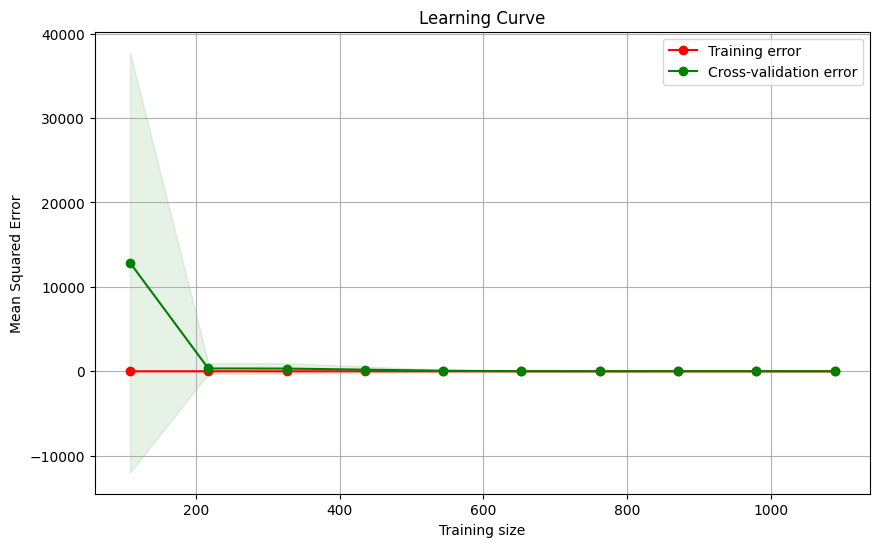

In [ ]:

# Try linear regression to compare

cleaned_data = all_stocks_data.dropna()

# X = cleaned_data.drop(['日期', '次日预计涨跌幅（%）','5日后收盘价预计涨跌（%）'], axis=1)
X = cleaned_data[['宏观新闻评分', '影响评分', '宏观新闻评分累计', '影响评分累计', '开盘价（元）', '收盘价（元）', '最高价（元）', '最低价（元）', '成交量（手）', '成交额（元）', '换手率（%）', '美债收益率', 'USDtoCNY', '开盘预涨幅（%）', '收盘价涨跌幅（%）', '当日涨跌幅（%）', '最大成交差价（元）', '振幅（%）', '5日成交量总和（手）', '5日收盘价涨跌幅（%）', '3日成交量总和（手）', '3日收盘价涨跌幅（%）']]
# X = cleaned_data.drop(['日期', '次日预计涨跌幅（%）'], axis=1)
y = cleaned_data['次日预计涨跌幅（%）']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

split_point = int(len(X_scaled) * 0.7)
X_train, X_test = X_scaled[:split_point], X_scaled[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# 初始化线性回归模型
model_linear = LinearRegression()

# 使用归一化或标准化后的训练数据拟合模型
# 注意替换 X_train_normalized 或 X_train_scaled 根据你的选择
model_linear.fit(X_train, y_train)

# 使用模型对测试集进行预测
y_pred = model_linear.predict(X_test)  # 根据你的选择替换 X_test_scaled 或 X_test_normalized

# 计算模型性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(y_pred)
print(y_test)

print(f"MSE: {mse}")
print(f"R²: {r2}")


list1 = np.array(y_test)
list2 = np.array(y_pred)
correct_count = np.sum((list1 > 0) == (list2 > 0))
accuracy = correct_count / len(list1)
print('Accuracy', accuracy)


# 计算残差
residuals = y_test - y_pred

# 绘制残差图
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model_linear, X_scaled, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# 计算训练和测试误差的均值和标准差
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# 绘制学习曲线
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")

plt.xlabel('Training size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

Accuracy: 0.625
Confusion Matrix:
 [[7 3]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.50      0.50      0.50         6

    accuracy                           0.62        16
   macro avg       0.60      0.60      0.60        16
weighted avg       0.62      0.62      0.62        16



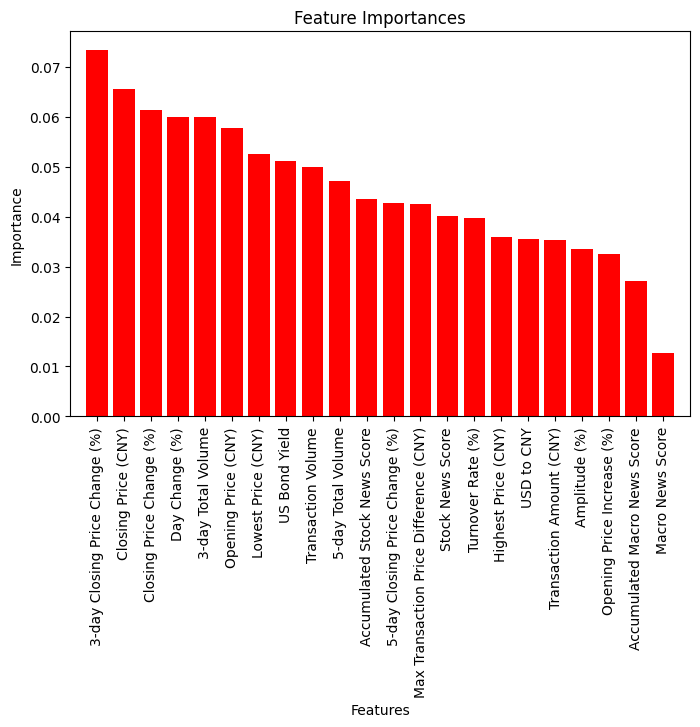

In [ ]:
# Random Forests
technical_noNa = all_stocks_data.dropna()

# 选择特征
# X = technical_noNa.drop(['日期', '次日预计涨跌幅（%）', '3日后收盘价预计涨跌（%）', '5日后收盘价预计涨跌（%）'], axis=1)
X = technical_noNa[['宏观新闻评分', '影响评分', '宏观新闻评分累计', '影响评分累计', '开盘价（元）', '收盘价（元）', '最高价（元）', '最低价（元）', '成交量（手）', '成交额（元）', '换手率（%）', '美债收益率', 'USDtoCNY', '开盘预涨幅（%）', '收盘价涨跌幅（%）', '当日涨跌幅（%）', '最大成交差价（元）', '振幅（%）', '5日成交量总和（手）', '5日收盘价涨跌幅（%）', '3日成交量总和（手）', '3日收盘价涨跌幅（%）']]
y = (technical_noNa['次日预计涨跌幅（%）'] > 0).astype(int)  # 将次日预计涨跌幅转换为二元标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用随机森林模型
rf = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=42)
rf.fit(X_train_scaled, y_train)

# 获取特征重要性
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 进行预测
y_pred = rf.predict(X_test_scaled)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

english_feature_names = [feature_map[X.columns[i]] for i in indices]

# 绘制特征重要性
plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], color="r", align='center')
plt.xticks(range(len(importances)), english_feature_names, rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



In [162]:
# 浦发银行 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '收盘价涨跌幅（%）', '美债收益率']
# 三安光电 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '最高价（元）', '成交额（元）', '换手率（%）', '5日成交量总和（手）', '3日成交量总和（手）', '美债收益率']
# 通威股份 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '换手率（%）', '最大成交差价（元）', '3日收盘价涨跌幅（%）']
# 三一重工 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '最高价（元）', '最大成交差价（元）', '5日成交量总和（手）', '3日收盘价涨跌幅（%）']
# 复星医药 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '振幅（%）']
# 贵州茅台 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '成交量（手）', '收盘价涨跌幅（%）', '5日成交量总和（手）']
# 上海机场 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '收盘价（元）', 'USDtoCNY']
# 民生银行 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '最高价（元）', '成交额（元）', '当日涨跌幅（%）']
# 中国石化 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '收盘价涨跌幅（%）', '5日成交量总和（手）']
# 招商银行 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '收盘价（元）', '成交额（元）', '当日涨跌幅（%）']
# 中国联通 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘预涨幅（元）', '3日收盘价涨跌幅（%）', 'USDtoCNY']
# 上汽集团 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '成交额（元）', '3日收盘价涨跌幅（%）']
# 恒瑞医药 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '当日涨跌幅（%）', '5日收盘价涨跌幅（%）', 'USDtoCNY']
# 万华化学 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '当日涨跌幅（%）', '开盘预涨幅（元）', '5日成交量总和（手）', '3日收盘价涨跌幅（%）', '美债收益率']
# 山东黄金 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '最高价（元）', '成交额（元）', '换手率（%）', '5日成交量总和（手）']
# 恒生电子 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '最低价（元）', '振幅（%）', '收盘价涨跌幅（%）', '最大成交差价（元）']
# 海螺水泥 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '最高价（元）', '最低价（元）', '收盘价涨跌幅（%）', '5日收盘价涨跌幅（%）', '3日成交量总和（手）']
# 用友网络 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '成交额（元）', '最低价（元）', '振幅（%）', '最大成交差价（元）', '当日涨跌幅（%）', '3日成交量总和（手）']
# 海尔智家 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '换手率（%）', '最大成交差价（元）', '开盘预涨幅（元）', '5日成交量总和（手）']
# 闻泰科技 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '最高价（元）', '最低价（元）', '收盘价（元）', '3日收盘价涨跌幅（%）', '5日成交量总和（手）', 'USDtoCNY']
# 山西汾酒 = ['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分', '开盘价（元）', '收盘价（元）', '成交额（元）', '振幅（%）', '开盘预涨幅（元）']

feature_dict = {
    "浦发银行": ["开盘价（元）", "收盘价涨跌幅（%）", "美债收益率", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "三安光电": ["最高价（元）", "成交额（元）", "换手率（%）", "5日成交量总和（手）", "3日成交量总和（手）", "美债收益率", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "通威股份": ["换手率（%）", "最大成交差价（元）", "3日收盘价涨跌幅（%）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "三一重工": ["开盘价（元）", "最高价（元）", "最大成交差价（元）", "5日成交量总和（手）", "3日收盘价涨跌幅（%）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "复星医药": ["振幅（%）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "贵州茅台": ["成交量（手）", "收盘价涨跌幅（%）", "5日成交量总和（手）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "宏观新闻评分"],
    "上海机场": ["收盘价（元）", "USDtoCNY", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "民生银行": ["最高价（元）", "收盘价（元）", "收盘价涨跌幅（%）", "当日涨跌幅（%）", "3日收盘价涨跌幅（%）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分", "宏观新闻评分"],
    "中国石化": ["收盘价涨跌幅（%）", "5日成交量总和（手）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "招商银行": ["收盘价（元）", "成交额（元）", "当日涨跌幅（%）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "中国联通": ["开盘预涨幅（%）", "3日收盘价涨跌幅（%）", "USDtoCNY", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "上汽集团": ["成交额（元）", "3日收盘价涨跌幅（%）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "恒瑞医药": ["收盘价（元）", "当日涨跌幅（%）", "5日收盘价涨跌幅（%）", "USDtoCNY", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "万华化学": ["开盘价（元）", "当日涨跌幅（%）", "开盘预涨幅（%）", "5日成交量总和（手）", "3日收盘价涨跌幅（%）", "美债收益率", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "山东黄金": ["开盘价（元）", "最高价（元）", "成交额（元）", "换手率（%）", "5日成交量总和（手）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "恒生电子": ["最低价（元）", "振幅（%）", "收盘价涨跌幅（%）", "最大成交差价（元）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "海螺水泥": ["开盘价（元）", "最高价（元）", "最低价（元）", "收盘价涨跌幅（%）", "5日收盘价涨跌幅（%）", "3日成交量总和（手）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "用友网络": ["成交额（元）", "最低价（元）", "振幅（%）", "最大成交差价（元）", "当日涨跌幅（%）", "3日成交量总和（手）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "海尔智家": ["开盘价（元）", "换手率（%）", "最大成交差价（元）", "开盘预涨幅（%）", "5日成交量总和（手）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "闻泰科技": ["最高价（元）", "最低价（元）", "收盘价（元）", "3日收盘价涨跌幅（%）", "5日成交量总和（手）", "USDtoCNY", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"],
    "山西汾酒": ["开盘价（元）", "收盘价（元）", "成交额（元）", "振幅（%）", "开盘预涨幅（%）", "影响评分累计", "宏观新闻评分", "宏观新闻评分累计", "影响评分"]
}

           日期  开盘价（元）  最高价（元）  最低价（元）  收盘价（元）   成交量（手）        成交额（元）  振幅（%）  \
0  2024-01-01     NaN     NaN     NaN     NaN      NaN           NaN    NaN   
1  2024-01-02  228.08  228.70  221.49  221.79  45686.0  1.020209e+09   3.12   
2  2024-01-03  221.01  223.19  219.20  221.07  35216.0  7.772095e+08   1.80   
3  2024-01-04  221.00  221.00  215.17  217.50  40450.0  8.785341e+08   2.64   
4  2024-01-05  216.98  217.82  214.13  215.22  32365.0  6.991674e+08   1.70   
..        ...     ...     ...     ...     ...      ...           ...    ...   
87 2024-03-28  246.00  248.98  244.70  245.10  28248.0  6.966521e+08   1.74   
88 2024-03-29  245.01  246.89  243.57  245.08  14115.0  3.455481e+08   1.35   
89 2024-03-30     NaN     NaN     NaN     NaN      NaN           NaN    NaN   
90 2024-03-31     NaN     NaN     NaN     NaN      NaN           NaN    NaN   
91 2024-04-01  245.00  257.00  244.99  252.54  41622.0  1.053378e+09   4.90   

    换手率（%）  涨跌幅（%）  ...  3日成交量总和（手）  3日后收盘价预计涨跌（%） 

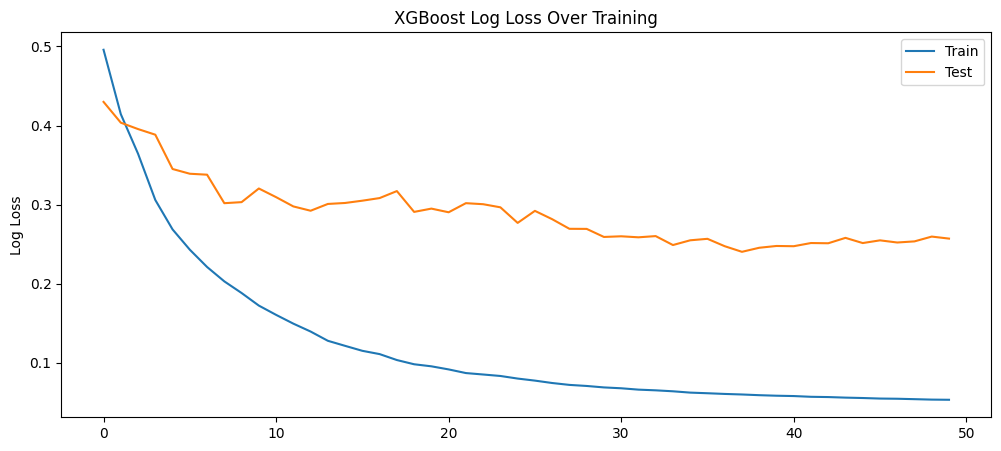

Accuracy: 0.9
Confusion Matrix:
 [[8 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.50      1.00      0.67         1

    accuracy                           0.90        10
   macro avg       0.75      0.94      0.80        10
weighted avg       0.95      0.90      0.91        10



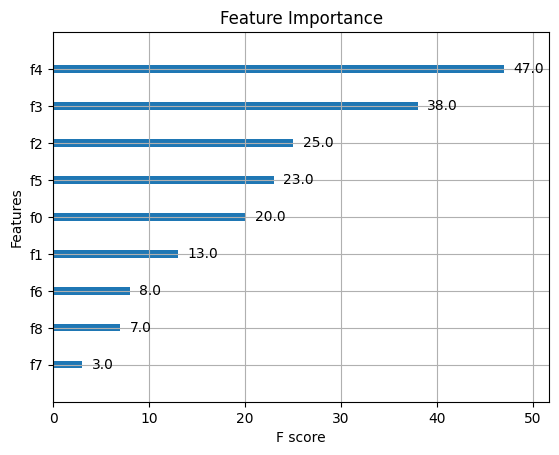

y_test 40    0
22    0
55    0
72    0
0     0
26    0
39    0
67    1
10    0
44    0
Name: 次日预计涨跌幅（%）, dtype: int64
y_pred [0 1 0 0 0 0 0 1 0 0]
Total number of features in the model: 9
Importance ratio of news: 0.22282608695652173


In [163]:
# XGBoosting

start_train = '2024-01-01'
end_train = '2024-04-01'

technical_noNa = all_stocks_data[(all_stocks_data['日期'] >= start_train) & (all_stocks_data['日期'] <= end_train)]
print(technical_noNa)
# technical_noNa = all_stocks_data
company = company_names[0]

# X = technical_noNa.drop(['日期', '次日预计涨跌幅（%）', '3日后收盘价预计涨跌（%）', '5日后收盘价预计涨跌（%）'], axis=1)
# X = technical_noNa[['开盘价（元）', '收盘价（元）', '最高价（元）', '最低价（元）', '成交量（手）', '成交额（元）', '换手率（%）', '美债收益率', 'USDtoCNY', '影响评分', '宏观新闻评分', '开盘预涨幅（%）', '收盘价涨跌幅（%）', '当日涨跌幅（%）', '最大成交差价（元）', '振幅（%）', '5日成交量总和（手）', '5日收盘价涨跌幅（%）', '3日成交量总和（手）', '3日收盘价涨跌幅（%）', '影响评分累计', '宏观新闻评分累计']]
X = technical_noNa[feature_dict[company]]
# X = technical_noNa[['影响评分累计','宏观新闻评分', '宏观新闻评分累计', '影响评分']]
y = (technical_noNa['次日预计涨跌幅（%）'] > 0).astype(int)  # 将次日预计涨跌幅转换为二元标签

# 数据切分
# split_point = int(len(technical_noNa) * 0.7)
# X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
# y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# 数据切分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# 模型参数
params = {
  'max_depth': 11,
  'min_child_weight': 1,
  'eta': 0.3,
  'subsample': 1,
  'colsample_bytree': 1,
  'objective': 'binary:logistic',
  'eval_metric': 'logloss'
}

# Train model and evaluate
evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}
bst = xgb.train(params, dtrain, num_boost_round=50, evals=evals, evals_result=evals_result, verbose_eval=True)

# Plot learning curve
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)
plt.figure(figsize=(12, 5))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['test']['logloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Over Training')
plt.show()

# Prediction and evaluation
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Feature importance
xgb.plot_importance(bst)
plt.title('Feature Importance')
plt.show()

print('y_test', y_test)
print('y_pred', y_pred)



# 获取模型的特征重要性
importance_dict = bst.get_score(importance_type='weight')
# 计算所有特征的重要性总和
total_importance_all = sum(importance_dict.values())
# 确定特征的总数
total_features = len(importance_dict)
print("Total number of features in the model:", total_features)
# 确定感兴趣的特征索引，即最后四个特征
interested_indices = [f'f{i}' for i in range(total_features - 4, total_features)]
# 计算最后四个特征的重要性总和
total_importance_last_four = sum(importance_dict.get(feat, 0) for feat in interested_indices)
# 计算占比
importance_ratio = total_importance_last_four / total_importance_all

print("Importance ratio of news:", importance_ratio)


In [144]:
# Trading simulation
start_trading_date = '2024-04-01'
end_trading_date = '2024-06-01'
df_data = all_stocks_data[(all_stocks_data['日期'] >= start_trading_date) & (all_stocks_data['日期'] <= end_trading_date)]
df_sim = df_data[df_data['交易日'] != 0]
df_sim = df_sim.set_index('日期')
print(df_sim)
# 假设 df_sim 是5月16日至6月1日的数据，且已经包含需要的所有特征
X_sim = df_sim[feature_dict[company]]
X_sim_scaled = scaler.transform(X_sim)  # 使用之前的Scaler来标准化数据

# 准备DMatrix
dtest_sim = xgb.DMatrix(X_sim_scaled)

# 使用模型进行预测
y_pred_sim_prob = bst.predict(dtest_sim)
y_pred_sim = (y_pred_sim_prob > 0.5).astype(int)

# 模拟交易
capital = 1000000  # 初始资金为100,000人民币
capital0 = capital
shares = 0
transactions = []

for i in range(len(df_sim) - 1):
    today_open = df_sim['开盘价（元）'].iloc[i]
    tomorrow_open = df_sim['开盘价（元）'].iloc[i + 1]

    if y_pred_sim[i] == 1:  # 如果模型预测第二天为正
        if capital > 0:  # 如果有足够的资金
            max_shares = int(capital / tomorrow_open)  # 最多可买的股票数
            shares_to_buy = (max_shares // 100) * 100  # 转换为整数手
            if shares_to_buy > 0:  # 确保至少购买一手
                shares += shares_to_buy
                spent = shares_to_buy * tomorrow_open
                capital -= spent
                transactions.append(('buy', df_sim.index[i+1], tomorrow_open, shares_to_buy))

    elif shares > 0:  # 如果模型预测第二天为负且持有股票
        capital += shares * tomorrow_open
        transactions.append(('sell', df_sim.index[i+1], tomorrow_open, shares))
        shares = 0

# 如果最后一天持有股票则卖出
if shares > 0:
    final_open = df_sim['开盘价（元）'].iloc[-1]
    capital += shares * final_open
    transactions.append(('sell', df_sim.index[-1], final_open, shares))
    shares = 0

# 输出交易记录和最终资金
for transaction in transactions:
    print(f"{transaction[0].title()} on {transaction[1]} at price {transaction[2]:.2f}, shares: {transaction[3]:.2f}")

print(f"Final capital after trading: ¥{capital:.2f}")

origin_share = (int(capital0 / df_sim['开盘价（元）'].iloc[1])//100)*100
origin_expect = origin_share * df_sim['开盘价（元）'].iloc[-1] + (capital0-origin_share*df_sim['开盘价（元）'].iloc[1])
print('expect income without this model', origin_expect)

            开盘价（元）  最高价（元）  最低价（元）  收盘价（元）    成交量（手）        成交额（元）  振幅（%）  \
日期                                                                          
2024-04-01   22.31   22.49   22.22   22.43  202761.0  4.528760e+08   1.21   
2024-04-02   22.43   22.54   22.32   22.37  146361.0  3.280489e+08   0.98   
2024-04-03   22.40   22.47   22.15   22.29  124211.0  2.767820e+08   1.43   
2024-04-08   22.29   22.42   22.08   22.17  132790.0  2.955523e+08   1.53   
2024-04-09   22.13   22.26   22.01   22.12  141863.0  3.135712e+08   1.13   
2024-04-10   22.03   22.13   21.67   21.77  176154.0  3.854734e+08   2.08   
2024-04-11   21.92   22.88   21.92   22.85  531773.0  1.201623e+09   4.41   
2024-04-12   22.74   22.94   22.48   22.55  245897.0  5.582654e+08   2.01   
2024-04-15   22.54   22.90   22.40   22.70  225225.0  5.109735e+08   2.22   
2024-04-16   22.70   23.05   22.58   22.80  240550.0  5.491414e+08   2.07   
2024-04-17   22.80   23.22   22.65   23.17  257924.0  5.924269e+08   2.50   

[0]	train-logloss:0.51706	test-logloss:0.53868
[1]	train-logloss:0.42680	test-logloss:0.49700
[2]	train-logloss:0.36419	test-logloss:0.48747
[3]	train-logloss:0.31462	test-logloss:0.46904
[4]	train-logloss:0.27363	test-logloss:0.47115
[5]	train-logloss:0.24222	test-logloss:0.45755
[6]	train-logloss:0.22099	test-logloss:0.47857
[7]	train-logloss:0.19828	test-logloss:0.48683
[8]	train-logloss:0.18073	test-logloss:0.49344
[9]	train-logloss:0.16660	test-logloss:0.50253
[10]	train-logloss:0.15370	test-logloss:0.51365
[11]	train-logloss:0.14438	test-logloss:0.51911
[12]	train-logloss:0.13485	test-logloss:0.53629
[13]	train-logloss:0.12694	test-logloss:0.54870
[14]	train-logloss:0.11973	test-logloss:0.55226
[15]	train-logloss:0.11401	test-logloss:0.55523
[16]	train-logloss:0.10849	test-logloss:0.55657
[17]	train-logloss:0.10348	test-logloss:0.57416
[18]	train-logloss:0.09925	test-logloss:0.57505
[19]	train-logloss:0.09588	test-logloss:0.57958
[20]	train-logloss:0.09265	test-logloss:0.59005
[2

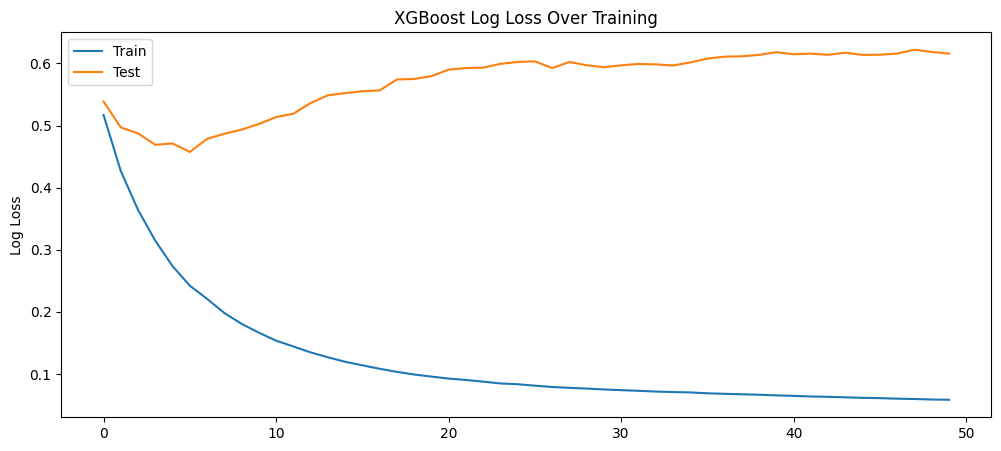

Accuracy: 0.6904761904761905
Confusion Matrix:
 [[21 10]
 [ 3  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.76        31
           1       0.44      0.73      0.55        11

    accuracy                           0.69        42
   macro avg       0.66      0.70      0.66        42
weighted avg       0.76      0.69      0.71        42



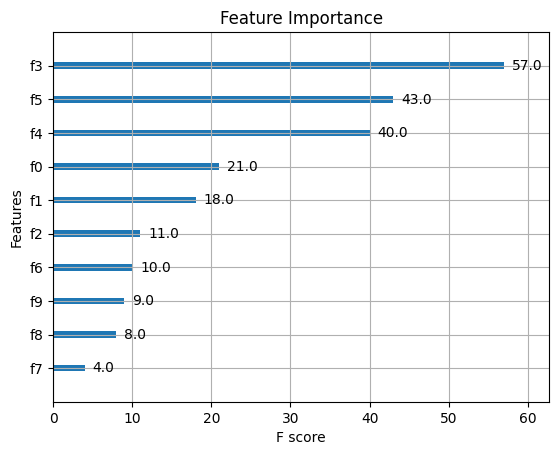

y_test 105    1
104    0
12     0
26     0
123    0
66     0
64     1
115    1
133    0
85     0
84     0
45     0
69     0
67     0
31     0
42     0
27     0
19     0
132    0
56     0
125    0
4      0
109    0
36     1
89     0
100    1
16     1
18     0
10     1
130    1
51     0
11     1
114    1
76     0
98     0
117    0
101    0
0      0
78     0
62     0
40     0
24     1
Name: 次日预计涨跌幅（%）, dtype: int64
y_pred [1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 1 0 0 1]
Total number of features in the model: 10
Importance ratio of news: 0.14027149321266968


In [145]:
# 特征准备

start_train = '2024-01-01'
end_train = '2024-05-16'

technical_noNa = all_stocks_data[(all_stocks_data['日期'] >= start_train) & (all_stocks_data['日期'] <= end_train)]
X = technical_noNa[feature_dict[company]]
y = (technical_noNa['次日预计涨跌幅（%）'] > 0).astype(int)

# 数据切分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# 模型参数
params = {
  'max_depth': 11,
  'min_child_weight': 1,
  'eta': 0.3,
  'subsample': 1,
  'colsample_bytree': 1,
  'objective': 'binary:logistic',
  'eval_metric': 'logloss'
}

# Train model and evaluate
evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}
bst = xgb.train(params, dtrain, num_boost_round=50, evals=evals, evals_result=evals_result, verbose_eval=True)

# Plot learning curve
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)
plt.figure(figsize=(12, 5))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['test']['logloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Over Training')
plt.show()

# Prediction and evaluation
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Feature importance
xgb.plot_importance(bst)
plt.title('Feature Importance')
plt.show()

print('y_test', y_test)
print('y_pred', y_pred)



# 获取模型的特征重要性
importance_dict = bst.get_score(importance_type='weight')
# 计算所有特征的重要性总和
total_importance_all = sum(importance_dict.values())
# 确定特征的总数
total_features = len(importance_dict)
print("Total number of features in the model:", total_features)
# 确定感兴趣的特征索引，即最后四个特征
interested_indices = [f'f{i}' for i in range(total_features - 4, total_features)]
# 计算最后四个特征的重要性总和
total_importance_last_four = sum(importance_dict.get(feat, 0) for feat in interested_indices)
# 计算占比
importance_ratio = total_importance_last_four / total_importance_all

print("Importance ratio of news:", importance_ratio)
